# General Feature Extraction

## Data Loader

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
url = 'https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/twitter4000.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,tweets,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     4000 non-null   object
 1   sentiment  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

tweets       0
sentiment    0
dtype: int64

In [6]:
df['sentiment'].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

## Characters Count

In [7]:
text = 'this is a   simple text'
len(text.replace(' ', ''))

17

In [8]:
# using the regex to remove the spaces
pattern = r'\s' # it say's that the space characters
re.sub(pattern, '', text)


'thisisasimpletext'

In [9]:
## lets count the chars in our tweet

df['char_counts'] = df['tweets'].apply(lambda x: len(re.sub(pattern, '', x)))
df.sample(5)

,tweets,sentiment,char_counts
2239,Another quick intro: co-ordinating from our He...,1,117
154,I miss my lappytop. Hope they hurry up with th...,0,46
410,"Feel sooo bad! I got Matty sick, now I'm at wo...",0,91
2520,@BrooklynnBrEEz Do I need to make an appointm...,1,49
3075,@unicornkid i burned my chemistry physics and ...,1,62


## Word Counts

In [10]:
df['word_counts'] = df['tweets'].apply(lambda x: len(x.split()))
df.sample(5)

,tweets,sentiment,char_counts,word_counts
687,@reamer77 it's never long enough though,0,34,6
3006,@sbmczh how was it? sucks they ran out of rb. ...,1,108,30
3851,@Alexa_13 You are,1,15,3
1055,"@Live_for_Films Yeah its fantastic, bit of a b...",0,106,20
60,@TwilightofDoom NICE!!!!! I havent seen that m...,0,54,9


## Average Word Length

In [11]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

df['avg_word_len']=df['avg_word_len'].apply(lambda x: round(x, 2))

df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len
0,is bored and wants to watch a movie any sugge...,0,43,10,4.30
1,back in miami. waiting to unboard ship,0,32,7,4.57
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,54,12,4.50
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.50
4,@mandagoforth me bad! It's funny though. Zacha...,0,116,26,4.46


## Stop Words Count

In [12]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as sw

In [13]:
len(sw) # so here in the spacy total 326 stop words are listed

326

In [14]:
x = 'This is an example text data for counting the stop words'
print([word for word in x.lower().split() if word in sw]) # these are the stopwords
len([word for word in x.lower().split() if word in sw])

['this', 'is', 'an', 'for', 'the']


5

In [15]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([word for word in x.lower().split() if word in sw]))
df.sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len
2815,"raze, i wish demi would see it",1,24,7,3.43,4
1735,@wolwol Crashed wol. No one survived,0,31,6,5.17,2
439,Didn't sleep well...not up to par....so I don'...,0,81,19,4.26,9
961,@officialrmc me too,0,17,3,5.67,2
1659,Friday night... And I'm not doing anything!! ...,0,101,23,4.39,13


## Count #Hash tags and @mentions

In [16]:
df['hashtag_count'] = df['tweets'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['mentions_count'] = df['tweets'].apply(lambda x: len(re.findall(r'@\w+', x)))
df.sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count
1484,got my phone taken away. I miss him already.,0,36,9,4.00,3,0,0
982,discovered that Busch Gardens and swim meets b...,0,108,25,4.32,13,0,0
339,I'm stressing like crazy It sucks cause this ...,0,73,17,4.29,5,0,0
3568,@zvespano hey zhirlyn congrats on ur baby girl...,1,58,13,4.46,4,0,1
3815,"@stoberitrixie it means, hey there! o kaya sup...",1,95,21,4.52,3,0,1


## Numeric digits in tweets

In [17]:
x = 'I want coupon code for the product ABC2345RT and XYZ43256YT. i need 20 pcs of all the items.'
re.findall(r'\b\d+\b', x)  # this is tells you to find the only numeric digits

['20']

In [18]:
df['numeric_counts'] = df['tweets'].apply(lambda x: len(re.findall(r'\b\d+\b', x)))
df.sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts
76,Oh and if only lens phone didnt die i would kn...,0,61,17,3.59,8,0,0,0
2319,@Kat_LB thanks lovely!!! in case you had forg...,1,54,9,6.00,3,0,1,0
2536,Ridin' the Air Forces once again to school,1,35,8,4.38,4,0,0,0
1483,@majatutaja really likes The Sohotel in Little...,0,114,20,5.70,8,0,2,4
1630,On the way to the most boring study day ever.....,0,88,21,4.19,11,0,0,0


In [19]:
df[df['numeric_counts']>0].head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts
13,Padres come back from being down 6-0 &amp; we ...,0,82,18,4.56,8,0,0,2
16,@BrianQuest I made 1 fo u 2: http://bit.ly/eId...,0,81,19,4.26,6,0,1,2
22,Back niggly again today (boo) so couldn't trai...,0,81,18,4.50,6,0,0,1
25,Eeeeep! New Moon is only 172 days away... Actu...,0,54,12,4.50,4,0,0,1
53,@Gen215 ROFL following Jesus! Found 1 th othr ...,0,109,29,3.76,11,0,1,3


## Count the UPPER case

In [20]:
x = 'HERE I am writing the code for CHECKING THE UPPER case words are present in the tweets data or not'

[word for word in x.split() if word.isupper()], len([word for word in x.split() if word.isupper()])

(['HERE', 'I', 'CHECKING', 'THE', 'UPPER'], 5)

In [21]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
df.sample(4)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts
2841,just got back from the salon! listening to som...,1,47,11,4.27,7,0,0,0,0
2879,is enjoying this... its much better now..,1,35,7,5.00,3,0,0,0,0
1308,"@ladyleolove nah no nerves hit,seems ur trying...",0,106,26,4.08,9,0,1,0,0
3247,@amandalester I'm n a scene where we tweet thr...,1,57,12,4.75,5,0,1,0,1


In [22]:
df[df['upper_counts']>3].iloc[0]['tweets']

"@jsong77  NOT DONE IT'S ALMOST 2 AM  this youtbe better start acting normaal"

# Preprocessing and Cleaning

## Lower Case Conversion

In [23]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [24]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [25]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,32,7,4.57,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,54,12,4.50,1,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.50,3,0,0,0,0
4,@mandagoforth me bad! it's funny though. zacha...,0,116,26,4.46,13,0,1,0,0


## Contraction to Expansion

In [26]:
import os
os.makedirs('data', exist_ok=True)

In [27]:
import json
contraction = json.load(open('data/contractions.json'))
# contraction

In [28]:
x = "don't mess with me. i'am done with this stuff."
x.split()

["don't", 'mess', 'with', 'me.', "i'am", 'done', 'with', 'this', 'stuff.']

In [29]:
[contraction.get(word.lower(), word) for word in x.split()]

['do not', 'mess', 'with', 'me.', "i'am", 'done', 'with', 'this', 'stuff.']

In [30]:
" ".join([contraction.get(word.lower(), word) for word in x.split()])

"do not mess with me. i'am done with this stuff."

In [31]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([contraction.get(word.lower(), word) for word in x.split()]))

In [32]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,32,7,4.57,3,0,0,0,0
2,@misskpey awwww dnt this bring back at keyboar...,0,54,12,4.50,1,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.50,3,0,0,0,0
4,@mandagoforth me bad! it is funny though. zach...,0,116,26,4.46,13,0,1,0,0


## Count and Remove Emails

In [33]:
x = 'contact me at udemy@kgptalie.com and info123IMP@kgptalkie.co.in and also find me on the 34_clg@gmail.ac.in'

pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z.-]+\.[A-Z|a-z]{2,}\b'
result = re.findall(pattern=pattern, string=x)
print(result)

['udemy@kgptalie.com', 'info123IMP@kgptalkie.co.in', '34_clg@gmail.ac.in']


In [34]:
df['emails'] = df['tweets'].apply(lambda x: ",".join(re.findall(pattern=pattern, string=x)))

In [35]:
df['emails'].value_counts()

emails
                               3999
markbradbury_16@hotmail.com       1
Name: count, dtype: int64

In [36]:
df['email_count'] = df['emails'].apply(lambda x: x.count(',')+1 if len(x)>0 else 0)

In [37]:
df['email_count'].value_counts()

email_count
0    3999
1       1
Name: count, dtype: int64

In [38]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0
1,back in miami. waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0
2,@misskpey awwww dnt this bring back at keyboar...,0,54,12,4.50,1,0,1,0,1,,0
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.50,3,0,0,0,0,,0
4,@mandagoforth me bad! it is funny though. zach...,0,116,26,4.46,13,0,1,0,0,,0


In [39]:
df['tweets']

0       is bored and wants to watch a movie any sugges...
1                  back in miami. waiting to unboard ship
2       @misskpey awwww dnt this bring back at keyboar...
3                        ughhh i am so tired blahhhhhhhhh
4       @mandagoforth me bad! it is funny though. zach...
                              ...                        
3995                                     i just graduated
3996              templating works; it all has to be done
3997                      mommy just brought me starbucks
3998    @omarepps watching you on a house re-run...lov...
3999    thanks for trying to make me smile i will make...
Name: tweets, Length: 4000, dtype: object

## Count and remove URLs

In [40]:
x = 'check this link: https://udityanarayantiwari.netlify.app and www.codefusioninhindi.com and also https://github.com/udityamerit'
pattern = r'http\S+|www\.\S+'
re.findall(pattern, x)

['https://udityanarayantiwari.netlify.app',
 'www.codefusioninhindi.com',
 'https://github.com/udityamerit']

In [41]:
df['urls'] = df['tweets'].apply(lambda x: re.findall(pattern, x))

In [42]:
df['urls_count'] = df['urls'].apply(lambda x: len(x))

In [43]:
df[df['urls_count']>0].sample(5)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count
3634,thinking of fuzzball more than air france http...,1,60,8,7.50,3,0,0,0,0,,0,[http://tinyurl.com/dhpol7],1
2080,the new version of greenweez was relased today...,1,101,19,5.32,10,0,0,0,1,,0,[http://bit.ly/egaka],1
2703,@tommcfly http://twitpic.com/6g55n - this one!...,1,53,7,7.57,2,0,1,0,1,,0,[http://twitpic.com/6g55n],1
2973,http://twiturm.com/w6u7 my first song made on ...,1,73,12,6.08,6,0,0,0,0,,0,[http://twiturm.com/w6u7],1
1319,three out of the six cases are from my beloved...,0,66,13,5.08,8,0,0,0,0,,0,[http://bit.ly/12aagr],1


In [44]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))
df[df['urls_count']>0].head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count
16,@brianquest i made 1 fo you 2: i tried but it...,0,81,19,4.26,6,0,1,2,3,,0,[http://bit.ly/eid8a],1
98,heading to work,0,37,4,9.25,1,0,0,0,0,,0,[http://twitpic.com/4eojz],1
99,@blondeblogger - i am so sad this is so blurry!,0,62,10,6.20,4,0,1,0,0,,0,[http://twitpic.com/4w8hk],1
144,i miss you â«,0,32,5,6.40,2,0,0,0,1,,0,[http://blip.fm/~8lc2f],1
183,photo: miss germany,0,44,4,11.00,0,0,0,0,0,,0,[http://tumblr.com/xf825f012],1


## Remove RT(retweet)

In [45]:
pattern = r'\bRT @\w+' ## pattern for the RT

In [46]:
df['is_retweet'] = df['tweets'].apply(lambda x: bool(len(re.findall(pattern, x))))

In [47]:
df['is_retweet'].sum() ## no retweet data in our dataset

0

In [48]:
## let's assume if any retweet data is present then how to remove it

df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x))

## Remove HTML tags

In [49]:
x = '<meta property="og:title" content="How to Become a successful machine learning engineer - KGP Talkie" />'

In [50]:
from bs4 import BeautifulSoup

In [51]:
# %pip install lxml

In [52]:
soup = BeautifulSoup(x, 'lxml')
soup

<html><head><meta content="How to Become a successful machine learning engineer - KGP Talkie" property="og:title"/></head></html>

In [53]:
soup.find('meta')['content']

'How to Become a successful machine learning engineer - KGP Talkie'

In [54]:
df['tweets']=df['tweets'].apply(lambda x: BeautifulSoup('<p>'+x+'<p>', 'lxml').get_text())

## Remove Accented Characters

In [55]:
import unicodedata

x = 'à, è, ì, ò, ù, À, È, Ì, Ò, Ù'

unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'a, e, i, o, u, A, E, I, O, U'

In [56]:
df['tweets']=df['tweets'].apply(lambda x:unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore') )

## Special Chars removal or punctuation removal

In [57]:
x = '@mandagoforth me bad! it is funny $though. #Zach'

pattern = r'@\w+'
re.findall(pattern, x)
x = re.sub(pattern, "", x).strip()
x

'me bad! it is funny $though. #Zach'

In [58]:
# [^A-Za-z0-9-] == [^\w\s]  it means detect all other than the words
pattern = r'[^\w\s]'
re.sub(pattern,'',x)


'me bad it is funny though Zach'

In [59]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, '', x).strip())

In [60]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count,is_retweet
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0,[],0,False
1,back in miami waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0,[],0,False
2,misskpey awwww dnt this bring back at keyboard...,0,54,12,4.50,1,0,1,0,1,,0,[],0,False
3,ughhh i am so tired blahhhhhhhhh,0,27,6,4.50,3,0,0,0,0,,0,[],0,False
4,mandagoforth me bad it is funny though zachary...,0,116,26,4.46,13,0,1,0,0,,0,[],0,False


## Remove the Repeated Chars

In [61]:
x = 'i loooovvvvvveeeeee learninggggggg'
pattern = r'(.)\1+'
re.sub(pattern, r'\1\1', x)

'i loovvee learningg'

In [62]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(pattern, r'\1\1', x))
df.head()

## after that we are correcting the sentence using the spell correcting algo

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count,is_retweet
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0,[],0,False
1,back in miami waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0,[],0,False
2,misskpey aww dnt this bring back at keyboard m...,0,54,12,4.50,1,0,1,0,1,,0,[],0,False
3,ughh i am so tired blahh,0,27,6,4.50,3,0,0,0,0,,0,[],0,False
4,mandagoforth me bad it is funny though zachary...,0,116,26,4.46,13,0,1,0,0,,0,[],0,False


## Removal of Stop Words

In [63]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words
x = 'this is a sample sentence with the stop words. this that and so many things..'
" ".join([word for word in x.split() if word not in stop_words])

'sample sentence stop words. things..'

In [64]:
df['tweets_no_stop'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [65]:
df.head(2)

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count,is_retweet,tweets_no_stop
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0,[],0,False,bored wants watch movie suggestions
1,back in miami waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0,[],0,False,miami waiting unboard ship


## Convert into base or root form of word

In [66]:
import spacy
nlp = spacy.load('en_core_web_sm')
x = 'The dogs and cats are playing. Children are going to school'
doc = nlp(x)

for token in doc:
        if token.pos_ in ['NOUN', 'VERB']:
                print(token.pos_, token.lemma_)

NOUN dog
NOUN cat
VERB play
NOUN child
VERB go
NOUN school


In [67]:
x = 'The dogs and cats are playing. Children are going to school'


def lemmatize_noun_verb(x):
        doc = nlp(x)
        tokens = []
        for token in doc:
                if token.pos_ in ['NOUN', 'VERB']:
                        tokens.append(token.lemma_)
                else:
                        tokens.append(token.text)
        x = ' '.join(tokens)
        pattern = r'\s\.'
        x = re.sub(pattern, '.', x)
        return x

lemmatize_noun_verb(x)

'The dog and cat are play. child are go to school'

In [68]:
# df['tweets'].apply(lambda x: lemmatize_noun_verb(x))
df['base_tweets'] = df['tweets'].apply(lemmatize_noun_verb)

# both are the same 

In [69]:
df[df['base_tweets'] != df['tweets']].iloc[1]

tweets            back in miami waiting to unboard ship
sentiment                                             0
char_counts                                          32
word_counts                                           7
avg_word_len                                       4.57
stop_words_len                                        3
hashtag_count                                         0
mentions_count                                        0
numeric_counts                                        0
upper_counts                                          0
emails                                                 
email_count                                           0
urls                                                 []
urls_count                                            0
is_retweet                                        False
tweets_no_stop               miami waiting unboard ship
base_tweets          back in miami wait to unboard ship
Name: 1, dtype: object

## Common words removal

In [70]:
x = ' '.join(df['tweets_no_stop'].tolist())
words = x.split()

In [71]:
# words

In [72]:
from collections import Counter
word_freq = Counter(words)
top10 = [word[0] for word in word_freq.most_common(10)]
print(top10)

['day', 'good', 'today', 'like', 'love', 'got', 'work', 'going', 'time', 'know']


In [73]:
df['no_common_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in top10]))

In [74]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count,is_retweet,tweets_no_stop,base_tweets,no_common_tweets
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0,[],0,False,bored wants watch movie suggestions,is bored and want to watch a movie any suggestion,is bored and wants to watch a movie any sugges...
1,back in miami waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0,[],0,False,miami waiting unboard ship,back in miami wait to unboard ship,back in miami waiting to unboard ship
2,misskpey aww dnt this bring back at keyboard m...,0,54,12,4.50,1,0,1,0,1,,0,[],0,False,misskpey aww dnt bring keyboard memoriess thnk...,misskpey aww dnt this bring back at keyboard m...,misskpey aww dnt this bring back at keyboard m...
3,ughh i am so tired blahh,0,27,6,4.50,3,0,0,0,0,,0,[],0,False,ughh tired blahh,ughh i am so tired blahh,ughh i am so tired blahh
4,mandagoforth me bad it is funny though zachary...,0,116,26,4.46,13,0,1,0,0,,0,[],0,False,mandagoforth bad funny zachary quinto reply sy...,mandagoforth me bad it is funny though zachary...,mandagoforth me bad it is funny though zachary...


## Rare words removal

In [75]:
least10 = [word[0] for word in word_freq.most_common()[-11:]]
print(least10)

['imjstsayin', 'littlefletcher', 'imstardust', 'heyhey', 'colin', 'saravananr', 'heycameron', 'thejetset', 'templating', 'omarepps', 'rerunlovin']


In [76]:
df['no_least_tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in least10]))

In [77]:
df.head()

,tweets,sentiment,char_counts,word_counts,avg_word_len,stop_words_len,hashtag_count,mentions_count,numeric_counts,upper_counts,emails,email_count,urls,urls_count,is_retweet,tweets_no_stop,base_tweets,no_common_tweets,no_least_tweets
0,is bored and wants to watch a movie any sugges...,0,43,10,4.30,5,0,0,0,0,,0,[],0,False,bored wants watch movie suggestions,is bored and want to watch a movie any suggestion,is bored and wants to watch a movie any sugges...,is bored and wants to watch a movie any sugges...
1,back in miami waiting to unboard ship,0,32,7,4.57,3,0,0,0,0,,0,[],0,False,miami waiting unboard ship,back in miami wait to unboard ship,back in miami waiting to unboard ship,back in miami waiting to unboard ship
2,misskpey aww dnt this bring back at keyboard m...,0,54,12,4.50,1,0,1,0,1,,0,[],0,False,misskpey aww dnt bring keyboard memoriess thnk...,misskpey aww dnt this bring back at keyboard m...,misskpey aww dnt this bring back at keyboard m...,misskpey aww dnt this bring back at keyboard m...
3,ughh i am so tired blahh,0,27,6,4.50,3,0,0,0,0,,0,[],0,False,ughh tired blahh,ughh i am so tired blahh,ughh i am so tired blahh,ughh i am so tired blahh
4,mandagoforth me bad it is funny though zachary...,0,116,26,4.46,13,0,1,0,0,,0,[],0,False,mandagoforth bad funny zachary quinto reply sy...,mandagoforth me bad it is funny though zachary...,mandagoforth me bad it is funny though zachary...,mandagoforth me bad it is funny though zachary...


## Word Cloud Visualization

In [78]:
# !pip install "wordcloud==1.9.3"

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

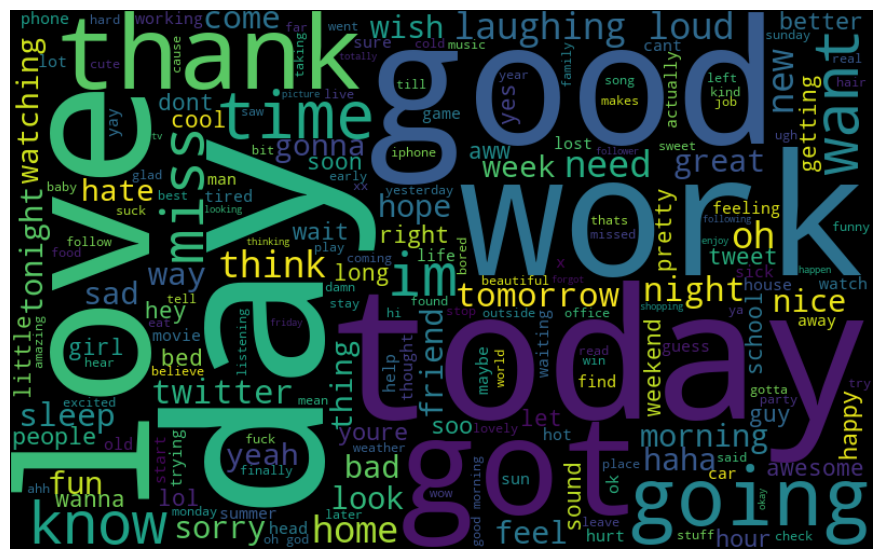

In [80]:
x = ' '.join(df['tweets_no_stop'].tolist())
cloud = WordCloud(width=800, height=500).generate(x)
plt.figure(figsize =(15,7), dpi=100)
plt.imshow(cloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

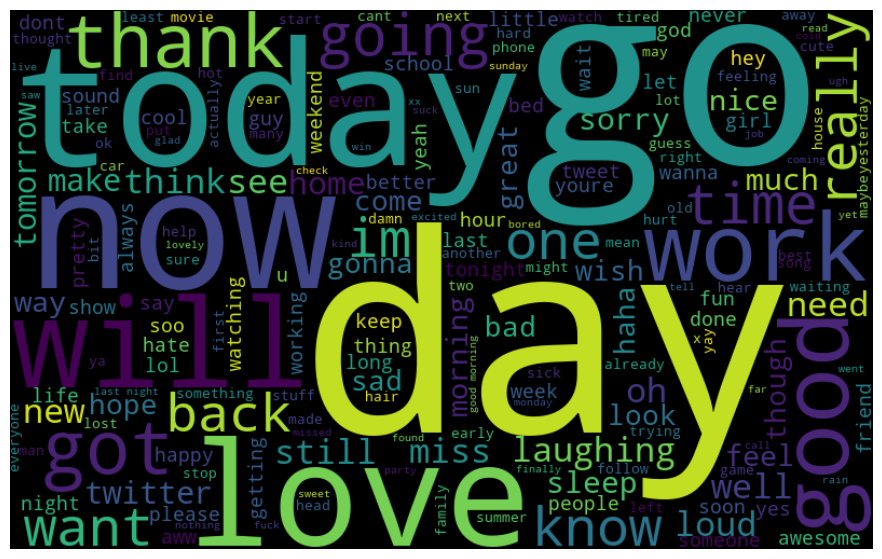

In [81]:
x = ' '.join(df['tweets'].tolist())
cloud = WordCloud(width=800, height=500).generate(x)
plt.figure(figsize =(15,7), dpi=100)
plt.imshow(cloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

## Spelling Correction

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
# !pip install -U textblob==0.18.0.post0
# !python -m textblob.download_corpora

In [84]:
from textblob import Word
x = 'abbility'
w = Word(x)
w.spellcheck()

[('ability', 1.0)]

In [85]:
x = 'xake'
w = Word(x)
w.spellcheck()

[('take', 0.4797507788161994),
 ('make', 0.3925233644859813),
 ('sake', 0.07554517133956386),
 ('wake', 0.02102803738317757),
 ('lake', 0.02102803738317757),
 ('cake', 0.004672897196261682),
 ('rake', 0.003115264797507788),
 ('bake', 0.001557632398753894),
 ('jake', 0.000778816199376947)]

In [86]:
x = 'i lovvvvvveeeeee learninggggggg'
pattern = r'(.)\1+'
x = re.sub(pattern, r'\1\1', x)

print(x)

words = []
for word in x.split():
        w = Word(word)
        words.append(w.correct())
' '.join(words)

i lovvee learningg


'i love learning'

In [87]:
def correct(x):
        words = []
        for word in x.split():
                w = Word(word)
                words.append(w.correct())

        return ' '.join(words)

correct(x)

'i love learning'

In [88]:
data = df.sample(100, random_state=0)

In [89]:
data['correct_tweets'] = data['tweets'].apply(correct)

In [90]:
data[data['tweets'] != data['correct_tweets']][['tweets', 'correct_tweets']].head()

,tweets,correct_tweets
3616,holy shiatsu i got a freakin b in physics than...,holy shirts i got a breaking b in physics than...
142,wants to go to the confirmation today but cant x,wants to go to the confirmation today but can x
1791,product of fundamentals class 300pm final exa...,product of fundamentals class 300pm final exam...
410,feel soo bad i got matty sick now i am at work...,feel so bad i got fatty sick now i am at work ...
1150,spicesierra sammee minus the oil change sucks,spicesierra same minus the oil change sucks


## Detecting Nouns Chunks and Phrases

In [91]:
x ="Visited the Apple Store at BKC recently and had a good experience overall. The store has a very premium vibe, and the staff is polite and knowledgeable. The product demo areas are well-organized and it’s nice to actually try devices before deciding.Only thing is that during peak hours, the wait time can get a bit long, even with appointment. But once attended, team was patient and helpful.Good place if you’re looking for genuine Apple support and product guidance."

In [92]:
from textblob import TextBlob

blob = TextBlob(x)
noun_phrase = blob.noun_phrases
noun_phrase

WordList(['visited', 'apple store', 'bkc', 'good experience overall', 'premium vibe', 'product demo areas', '’ s', 'peak hours', 'helpful.good place', '’ re', 'apple', 'product guidance'])

In [93]:
doc = nlp(x)

noun_chunks = [chunk.text for chunk in doc.noun_chunks]

noun_chunks

['the Apple Store',
 'BKC',
 'a good experience',
 'The store',
 'a very premium vibe',
 'the staff',
 'The product demo areas',
 'it',
 'devices',
 'Only thing',
 'peak hours',
 'the wait time',
 'appointment',
 'team',
 'Good place',
 'you',
 'genuine Apple support',
 'product guidance']

- So the NLTK Noun Chunking is much better that the SpaCy Noun Chucking

In [94]:
data['noun_chunks'] = data['tweets'].apply(lambda x: TextBlob(x).noun_phrases)

In [95]:
data['noun_chunks'].value_counts().head(10)

noun_chunks
[]                                                           24
[blue sky, longmont tri, awesome volunteers, team jokaan]     1
[great walk, good results]                                    1
[davidarchie david, show i]                                   1
[vou virar gente]                                             1
[timdisaster good]                                            1
[virgin megastore]                                            1
[soo boredd, fight tear]                                      1
[hmm wedding planning stresses]                               1
[airport vacation]                                            1
Name: count, dtype: int64

## N-Gram, Word Counts, Singularize, Pluralize, Lemmatize and much more

In [96]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with man.'

In [97]:
blob = TextBlob(x)

In [98]:
['_'.join(word) for word in blob.ngrams(2)] # this is bigram(2) and you can make it trigram(3) words keep together and so on we are use this for the plotting our word cloud

['Cats_and',
 'and_Dogs',
 'Dogs_are',
 'are_playing',
 'playing_together',
 'together_Cats',
 'Cats_are',
 'are_running',
 'running_faster',
 'faster_than',
 'than_dogs',
 'dogs_The',
 'The_Ox',
 'Ox_is',
 'is_playing',
 'playing_with',
 'with_man']

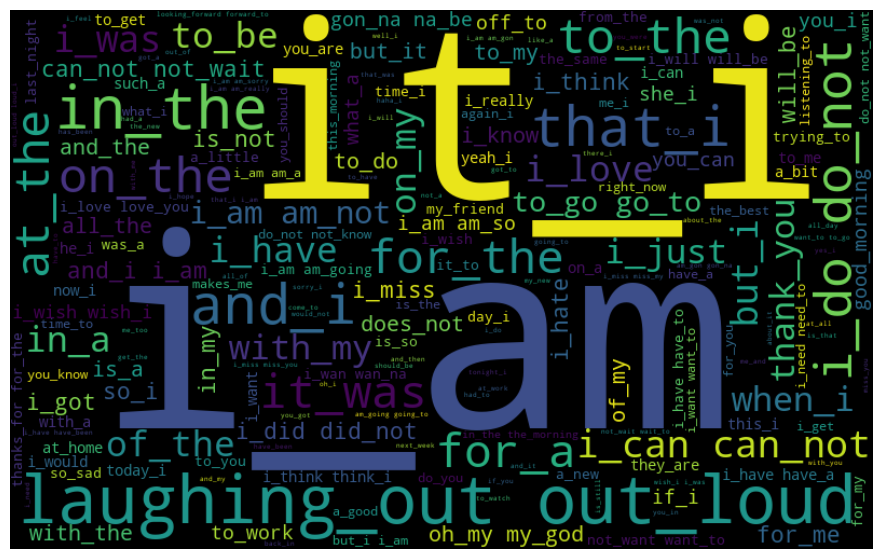

In [99]:
x = ' '.join(df['tweets'].tolist())
blob = TextBlob(x)
x = ' '.join(['_'.join(word) for word in blob.ngrams(2)])
cloud = WordCloud(width=800, height=500).generate(x)
plt.figure(figsize =(15,7), dpi=100)
plt.imshow(cloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

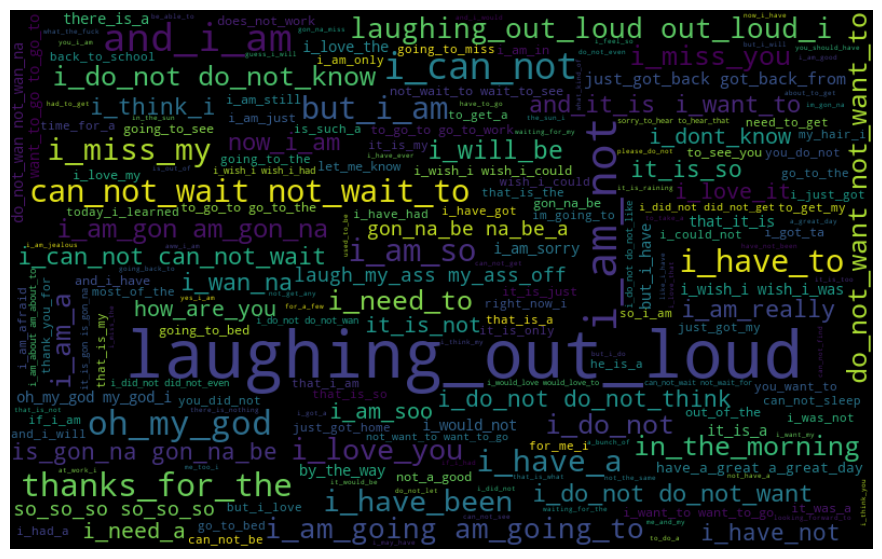

In [100]:
x = ' '.join(df['tweets'].tolist())
blob = TextBlob(x)
x = ' '.join(['_'.join(word) for word in blob.ngrams(3)])
cloud = WordCloud(width=800, height=500).generate(x)
plt.figure(figsize =(15,7), dpi=100)
plt.imshow(cloud.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
x = 'Cats and Dogs are playing together. Cats are running faster than dogs. The Ox is playing with man.'
x = x.lower()

blob = TextBlob(x)

pattern = r'\bcats\b' # using the pattern we can find out or count the words
len(re.findall(pattern, x)) 

2

In [102]:
blob.words.count('cats'), blob.words.count('dog')

(2, 0)

In [103]:
blob.words

WordList(['cats', 'and', 'dogs', 'are', 'playing', 'together', 'cats', 'are', 'running', 'faster', 'than', 'dogs', 'the', 'ox', 'is', 'playing', 'with', 'man'])

In [104]:
[word for word in blob.tags]

[('cats', 'NNS'),
 ('and', 'CC'),
 ('dogs', 'NNS'),
 ('are', 'VBP'),
 ('playing', 'VBG'),
 ('together', 'RB'),
 ('cats', 'NNS'),
 ('are', 'VBP'),
 ('running', 'VBG'),
 ('faster', 'RBR'),
 ('than', 'IN'),
 ('dogs', 'NNS'),
 ('the', 'DT'),
 ('ox', 'NN'),
 ('is', 'VBZ'),
 ('playing', 'VBG'),
 ('with', 'IN'),
 ('man', 'NN')]

In [105]:
[word.singularize() if tag in ['NNS'] else word for word, tag in blob.tags] # here we are converting the Plural to singular nouns

['cat',
 'and',
 'dog',
 'are',
 'playing',
 'together',
 'cat',
 'are',
 'running',
 'faster',
 'than',
 'dog',
 'the',
 'ox',
 'is',
 'playing',
 'with',
 'man']

In [106]:
[word.pluralize() if tag in ['NN'] else word for word, tag in blob.tags] # here we are converting the singular to plural nouns

['cats',
 'and',
 'dogs',
 'are',
 'playing',
 'together',
 'cats',
 'are',
 'running',
 'faster',
 'than',
 'dogs',
 'the',
 'oxen',
 'is',
 'playing',
 'with',
 'men']

In [107]:
print([word.lemmatize('v') for word in blob.words])

['cat', 'and', 'dog', 'be', 'play', 'together', 'cat', 'be', 'run', 'faster', 'than', 'dog', 'the', 'ox', 'be', 'play', 'with', 'man']


## Use TextBlob's Inbuilt Sentiment Classifier

In [108]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 'we all stand together. we are gonna win this fight'

blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())

blob.sentiment

Sentiment(classification='pos', p_pos=0.8948284226465963, p_neg=0.10517157735340235)

In [109]:
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv', sep='\t')

In [110]:
data = data.sample(10, random_state=0)

In [111]:
data['sentiment_pred'] = data['review'].apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment.classification)

In [112]:
data.head()

,label,review,sentiment_pred
405,neg,the original babe gets my vote as the best fam...,pos
1190,pos,the most amazing thing about paul cox's innoce...,pos
1132,pos,"part one of "" the strangest movies ever made ""...",pos
731,neg,movies don't come much more ridiculously title...,neg
1754,neg,this is the last carry on film with its almost...,neg


In [113]:
# let's find out the accuracy here
data['label'].value_counts(), data['sentiment_pred'].value_counts()

# here in the true label it have 6 pos but it is predicting the 7 pos, 1 extra so the acc is 90%

(label
 pos    6
 neg    4
 Name: count, dtype: int64,
 sentiment_pred
 pos    7
 neg    3
 Name: count, dtype: int64)

- So this sentiment classifier is not fully corrected because here we did't use any ml algorithm for this but for the showing the sentiment analysis purpose i am using the inbuilt sentiment classifier

## Language Translation and Detection

In [122]:
# !pip install deep-translator


In [ ]:
from deep_translator import GoogleTranslator

from langdetect import detect

hu


In [ ]:
x = 'Mindannyian együtt fogunk állni. Meg fogjuk nyerni ezt a harcot.' # this is hungarian language denoted by (hu)

language = detect(x)
print(language)


hu
